# Aashia Mehta
# CS 7641: Machine Learning
# Project 2: Randomized Optimization

In [236]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from textwrap import wrap
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve, learning_curve, KFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, plot_confusion_matrix
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Import Error Workaround
import six
import sys
sys.modules['sklearn.externals.six'] = six

# import mlrose
import mlrose_hiive as mlrose

In [411]:
def plot_fitnesses(problem_name, algorithms, fitness_curves):
    plt.title("Iterations vs. Fitness " + "\n(" + problem_name + ")")
    plt.xlabel("Iterations")
    plt.ylabel("Fitness")
    for i in range(0, len(fitness_curves)):
        fitness_curve = fitness_curves[i][:,0]
        algorithm = algorithms[i]
        plt.plot(range(len(fitness_curve)), fitness_curve, label=algorithm)
        plt.legend(loc="best")
    plt.show()
    plt.close()
    
def plot_function_evaluations(problem_name, algorithms, fitness_curves):
    plt.title("Iterations vs. Function Evaluations " + "\n(" + problem_name + ")")
    plt.xlabel("Iterations")
    plt.ylabel("Function Evaluations")
    for i in range(0, len(fitness_curves)):
        fitness_curve = fitness_curves[i][:,1]
        algorithm = algorithms[i]
        plt.plot(range(len(fitness_curve)), fitness_curve, label=algorithm)
        plt.legend(loc="best")
    plt.show()
    plt.close()
    
    
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center',
                 Bbox = dict(alpha =.8))

def plot_times(problem_name, algorithms, times):
    algorithms = ['\n'.join(wrap(x, 12)) for x in algorithms]
    plt.title("Local Random Search Algorithm Times " + "(" + problem_name + ")")
    plt.xlabel("Local Random Search Algorithm")
    plt.ylabel("Run Time (in seconds)")
    plt.bar(algorithms, times, label="Wall Clock Time")
    addlabels(algorithms, times)
    plt.legend(loc="best")
    plt.show()

algorithms = ["Randomized Hill Climbing", "Simulated Annealing", "Genetic Algorithm", "MIMIC"]
np.random.seed(5)
random_state = 5

## 4 Peaks

In [375]:
t_pct = 0.20

four_peaks_fitness = mlrose.FourPeaks(t_pct=t_pct)
four_peaks_problem_size_5 = mlrose.DiscreteOpt(length=5, 
                             fitness_fn=four_peaks_fitness, 
                             maximize=True)
four_peaks_problem_size_10 = mlrose.DiscreteOpt(length=10, 
                             fitness_fn=four_peaks_fitness, 
                             maximize=True)
four_peaks_problem_size_20 = mlrose.DiscreteOpt(length=20, 
                             fitness_fn=four_peaks_fitness, 
                             maximize=True)
four_peaks_problem_size_50 = mlrose.DiscreteOpt(length=50, 
                             fitness_fn=four_peaks_fitness, 
                             maximize=True)
four_peaks_problem_size_100 = mlrose.DiscreteOpt(length=100, 
                             fitness_fn=four_peaks_fitness, 
                             maximize=True)

Restarts : 0 Fitness:  4.0
Restarts : 1 Fitness:  4.0
Restarts : 2 Fitness:  6.0
Restarts : 3 Fitness:  6.0
Restarts : 4 Fitness:  6.0
Restarts : 5 Fitness:  6.0
Restarts : 6 Fitness:  6.0
Restarts : 7 Fitness:  13.0
Restarts : 8 Fitness:  13.0
Restarts : 9 Fitness:  13.0
Restarts : 10 Fitness:  13.0


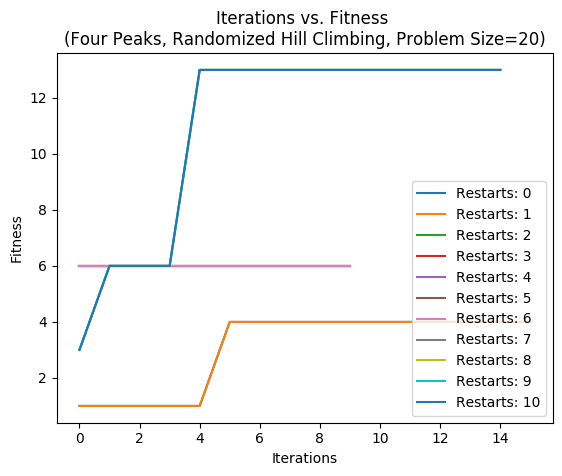

In [388]:
# Tuning Randomized Hill Climbing
plt.title("Iterations vs. Fitness " + "\n(Four Peaks, Randomized Hill Climbing, Problem Size=20)")
plt.xlabel("Iterations")
plt.ylabel("Fitness")
problem = four_peaks_problem_size_20
max_attempts = 10
restarts_list = np.arange(0, 11).tolist()
for restarts in restarts_list:
    best_state_hc, best_fitness_hc, fitness_curve_hc = mlrose_hiive.random_hill_climb(problem,
                                                 max_attempts=max_attempts,
                                                 max_iters=1000,
                                                 random_state=random_state,
                                                 restarts=restarts,
                                                 curve=True)
    print("Restarts :", restarts, "Fitness: ", best_fitness_hc)
    plt.plot(range(len(fitness_curve_hc[:,0])), fitness_curve_hc[:,0], label="Restarts: " + str(restarts))
plt.legend(loc="best")
plt.show()
plt.close()

Schedule : ExpDecay(exp_const=0.05) Fitness:  32.0
Schedule : ExpDecay(exp_const=0.01) Fitness:  18.0
Schedule : ExpDecay(exp_const=0.1) Fitness:  32.0
Schedule : GeomDecay(decay=0.95) Fitness:  32.0
Schedule : GeomDecay(decay=0.99) Fitness:  18.0
Schedule : GeomDecay(decay=0.9) Fitness:  17.0
Schedule : ArithDecay(decay=0.95) Fitness:  17.0
Schedule : ArithDecay(decay=0.99) Fitness:  17.0
Schedule : ArithDecay(decay=0.9) Fitness:  17.0


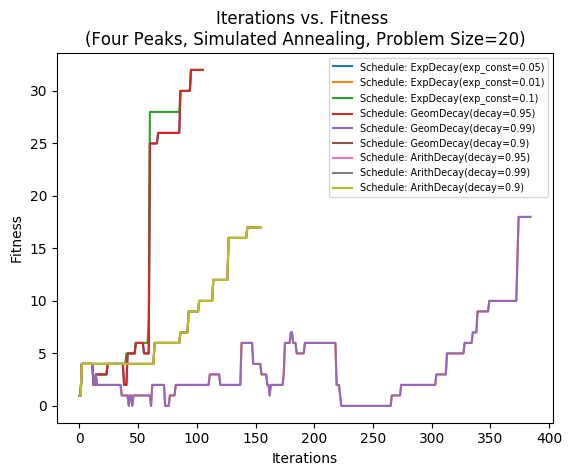

In [387]:
# Tuning Simulated Annealing
plt.title("Iterations vs. Fitness " + "\n(Four Peaks, Simulated Annealing, Problem Size=20)")
plt.xlabel("Iterations")
plt.ylabel("Fitness")
problem = four_peaks_problem_size_20
max_attempts = 10
schedule_list_names = ["ExpDecay(exp_const=0.05)", "ExpDecay(exp_const=0.01)","ExpDecay(exp_const=0.1)",
                       "GeomDecay(decay=0.95)", "GeomDecay(decay=0.99)","GeomDecay(decay=0.9)",
                       "ArithDecay(decay=0.95)","ArithDecay(decay=0.99)","ArithDecay(decay=0.9)"] 
schedule_list = [mlrose.ExpDecay(init_temp=10, exp_const=0.05), 
                 mlrose.ExpDecay(init_temp=10, exp_const=0.01),
                 mlrose.ExpDecay(init_temp=10, exp_const=0.1),
                 mlrose.GeomDecay(init_temp=10, decay=0.95), 
                 mlrose.GeomDecay(init_temp=10, decay=0.99), 
                 mlrose.ArithDecay(init_temp=10, decay=0.9), 
                 mlrose.ArithDecay(init_temp=10, decay=0.95), 
                 mlrose.ArithDecay(init_temp=10, decay=0.99), 
                 mlrose.ArithDecay(init_temp=10, decay=0.9)]
for i in range(0, len(schedule_list)):
    schedule = schedule_list[i]
    schedule_name = schedule_list_names[i]
    best_state_hc, best_fitness_hc, fitness_curve_hc = mlrose_hiive.simulated_annealing(problem,
                                                 max_attempts=max_attempts,
                                                 max_iters=1000,
                                                 random_state=random_state,
                                                 schedule=schedule,
                                                 curve=True)
    print("Schedule :", schedule_name, "Fitness: ", best_fitness_hc)
    plt.plot(range(len(fitness_curve_hc[:,0])), fitness_curve_hc[:,0], label="Schedule: " + schedule_name)
plt.legend(loc="best", fontsize="x-small")
plt.show()
plt.close()

Pop Size : 100 Mutation Prob:  0.01 Fitness:  28.0
Pop Size : 500 Mutation Prob:  0.01 Fitness:  32.0
Pop Size : 1000 Mutation Prob:  0.01 Fitness:  35.0
Pop Size : 100 Mutation Prob:  0.1 Fitness:  28.0
Pop Size : 500 Mutation Prob:  0.1 Fitness:  32.0
Pop Size : 1000 Mutation Prob:  0.1 Fitness:  32.0
Pop Size : 100 Mutation Prob:  0.3 Fitness:  27.0
Pop Size : 500 Mutation Prob:  0.3 Fitness:  30.0
Pop Size : 1000 Mutation Prob:  0.3 Fitness:  33.0
Pop Size : 100 Mutation Prob:  0.5 Fitness:  26.0
Pop Size : 500 Mutation Prob:  0.5 Fitness:  32.0
Pop Size : 1000 Mutation Prob:  0.5 Fitness:  28.0
Pop Size : 100 Mutation Prob:  1 Fitness:  30.0
Pop Size : 500 Mutation Prob:  1 Fitness:  31.0
Pop Size : 1000 Mutation Prob:  1 Fitness:  31.0


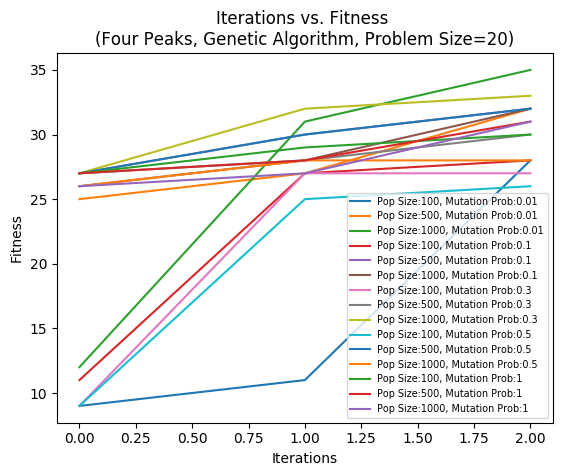

In [408]:
# Tuning Genetic Algorithm
plt.title("Iterations vs. Fitness " + "\n(Four Peaks, Genetic Algorithm, Problem Size=20)")
plt.xlabel("Iterations")
plt.ylabel("Fitness")
problem = four_peaks_problem_size_20
max_attempts = 10
pop_size_list = [100, 500, 1000]
mutation_prob_list = [0.01, 0.1, 0.3, 0.5, 1]
for mutation_prob in mutation_prob_list:
    for pop_size in pop_size_list:
        best_state_hc, best_fitness_hc, fitness_curve_hc = mlrose_hiive.genetic_alg(problem,
                                                     max_attempts=max_attempts,
                                                     max_iters=3,
                                                     random_state=random_state,
                                                     pop_size=pop_size,
                                                     mutation_prob=mutation_prob,
                                                     curve=True)
        print("Pop Size :", pop_size, "Mutation Prob: ", mutation_prob, "Fitness: ", best_fitness_hc)
        plt.plot(range(len(fitness_curve_hc[:,0])), fitness_curve_hc[:,0], 
                 label="Pop Size:" + str(pop_size) + ", Mutation Prob:" + str(mutation_prob))
plt.legend(loc="best", fontsize="x-small")
plt.show()
plt.close()

Pop Size : 100 Keep Pct:  0.01 Fitness:  9.0
Pop Size : 500 Keep Pct:  0.01 Fitness:  32.0
Pop Size : 1000 Keep Pct:  0.01 Fitness:  30.0
Pop Size : 100 Keep Pct:  0.1 Fitness:  27.0
Pop Size : 500 Keep Pct:  0.1 Fitness:  35.0
Pop Size : 1000 Keep Pct:  0.1 Fitness:  33.0
Pop Size : 100 Keep Pct:  0.3 Fitness:  30.0
Pop Size : 500 Keep Pct:  0.3 Fitness:  30.0
Pop Size : 1000 Keep Pct:  0.3 Fitness:  30.0
Pop Size : 100 Keep Pct:  0.5 Fitness:  12.0
Pop Size : 500 Keep Pct:  0.5 Fitness:  28.0
Pop Size : 1000 Keep Pct:  0.5 Fitness:  30.0
Pop Size : 100 Keep Pct:  1 Fitness:  27.0
Pop Size : 500 Keep Pct:  1 Fitness:  27.0
Pop Size : 1000 Keep Pct:  1 Fitness:  28.0


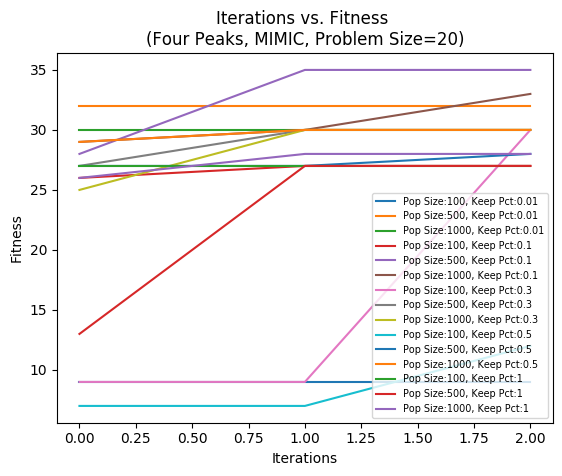

In [407]:
# Tuning MIMIC
plt.title("Iterations vs. Fitness " + "\n(Four Peaks, MIMIC, Problem Size=20)")
plt.xlabel("Iterations")
plt.ylabel("Fitness")
problem = four_peaks_problem_size_20
max_attempts = 10
pop_size_list = [100, 500, 1000]
keep_pct_list = [0.01, 0.1, 0.3, 0.5, 1]
for keep_pct in keep_pct_list:
    for pop_size in pop_size_list:
        best_state_hc, best_fitness_hc, fitness_curve_hc = mlrose_hiive.mimic(problem,
                                                     max_attempts=max_attempts,
                                                     max_iters=3,
                                                     random_state=random_state,
                                                     pop_size=pop_size,
                                                     keep_pct=keep_pct,
                                                     curve=True)
        print("Pop Size :", pop_size, "Keep Pct: ", keep_pct, "Fitness: ", best_fitness_hc)
        plt.plot(range(len(fitness_curve_hc[:,0])), fitness_curve_hc[:,0], 
                 label="Pop Size:" + str(pop_size) + ", Keep Pct:" + str(keep_pct))
plt.legend(loc="best", fontsize="x-small")
plt.show()
plt.close()


--------Randomized Hill Climbing--------
Fitness:  13.0 , # of Iterations:  15 , Time:  0.003471851348876953

--------Simulated Annealing--------
Fitness:  32.0 , # of Iterations:  106 , Time:  0.0033452510833740234

--------Genetic Algorithm--------
Fitness:  35.0 , # of Iterations:  13 , Time:  0.7100069522857666

--------MIMIC--------
Fitness:  35.0 , # of Iterations:  13 , Time:  1.505645751953125


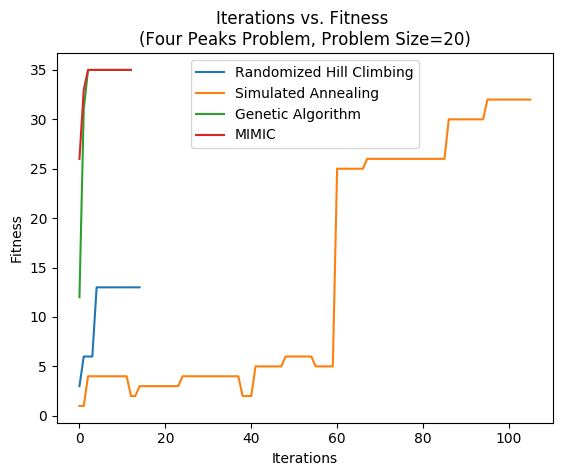

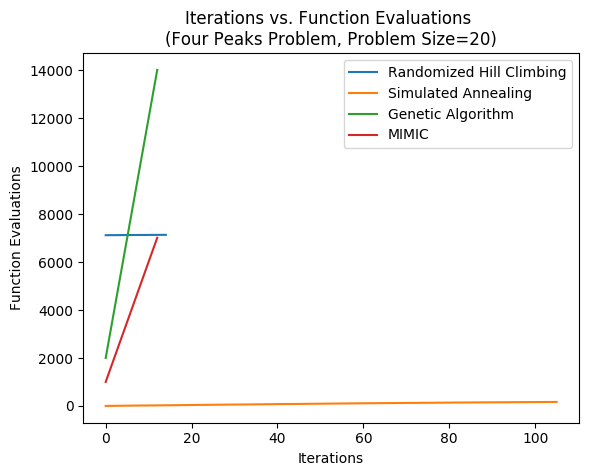

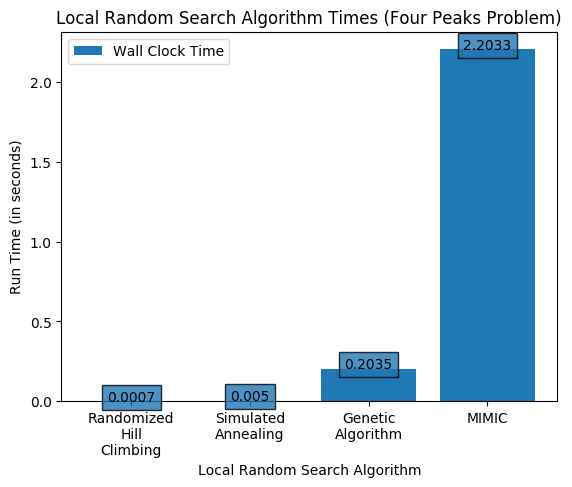

In [412]:
# https://mlrose.readthedocs.io/en/stable/source/fitness.html
problem = four_peaks_problem_size_20
# Four Peaks: Randomized Hill Climbing
restarts = 7
time_start = time.time()
best_state_hc, best_fitness_hc, fitness_curve_hc = mlrose.random_hill_climb(problem=problem, 
                                                    max_attempts=max_attempts, 
                                                    max_iters=max_iters,restarts=restarts,
                                                    random_state=random_state, 
                                                    curve=True)
time_end = time.time()
time_hc = time_end - time_start

# Four Peaks: Simulated Annealing
schedule = mlrose.GeomDecay(init_temp=10, decay=0.95)
time_start = time.time()
best_state_sa, best_fitness_sa, fitness_curve_sa =  mlrose.simulated_annealing(problem=problem, 
                                                     schedule=schedule, 
                                                     max_attempts=max_attempts, 
                                                     max_iters=max_iters,
                                                     random_state=random_state, 
                                                     curve=True)
time_end = time.time()
time_sa = time_end - time_start

# Four Peaks: Genetic Algorithm
pop_size = 1000
mutation_prob = 0.01
time_start = time.time()
best_state_ga, best_fitness_ga, fitness_curve_ga =  mlrose.genetic_alg(problem=problem, 
                                             max_attempts=max_attempts, 
                                             max_iters=max_iters, pop_size=pop_size, mutation_prob=mutation_prob,
                                             random_state=random_state, curve=True)
time_end = time.time()
time_ga = time_end - time_start

# Four Peaks: MIMIC
pop_size = 500
keep_pct = 0.1
time_start = time.time()
best_state_m, best_fitness_m, fitness_curve_m = mlrose.mimic(problem=problem, 
                                            max_attempts=max_attempts,
                                            max_iters=max_iters, pop_size=pop_size, keep_pct=keep_pct, curve=True)
time_end = time.time()
time_m = time_end - time_start

print("\n--------Randomized Hill Climbing--------")
print("Fitness: ", best_fitness_hc, ", # of Iterations: ", len(fitness_curve_hc), ", Time: ", time_hc)
print("\n--------Simulated Annealing--------")
print("Fitness: ", best_fitness_sa, ", # of Iterations: ", len(fitness_curve_sa), ", Time: ", time_sa)
print("\n--------Genetic Algorithm--------")
print("Fitness: ", best_fitness_ga, ", # of Iterations: ", len(fitness_curve_ga), ", Time: ", time_ga)
print("\n--------MIMIC--------")
print("Fitness: ", best_fitness_m, ", # of Iterations: ", len(fitness_curve_m), ", Time: ", time_m)

four_peaks_fitness_curves = [fitness_curve_hc, fitness_curve_sa, fitness_curve_ga, fitness_curve_m]
plot_fitnesses("Four Peaks Problem, Problem Size=20", algorithms, four_peaks_fitness_curves)
plot_function_evaluations("Four Peaks Problem, Problem Size=20", algorithms, four_peaks_fitness_curves)

four_peaks_times = [time_hc, time_sa, time_ga, time_m]
four_peaks_times = [round(i, 4) for i in times]
plot_times("Four Peaks Problem", algorithms, four_peaks_times)

In [454]:
problem_size_list = [5, 10, 20, 50, 100]
algorithm_names = ["Randomized Hill Climbing", "Simulated Annealing", "Genetic Algorithm", "MIMIC"]
algorithm_colors = ["blue", "orange", "green", "red"]

four_peaks_times_per_algorithm = {}
four_peaks_function_evaluations_per_algorithm = {}
four_peaks_fitness_per_algorithm = {}
for name in algorithm_names:
        four_peaks_times_per_algorithm[name] = []
        four_peaks_function_evaluations_per_algorithm[name] = []
        four_peaks_fitness_per_algorithm[name] = []
print(four_peaks_times_per_algorithm)

{'Randomized Hill Climbing': [], 'Simulated Annealing': [], 'Genetic Algorithm': [], 'MIMIC': []}


In [455]:
# https://mlrose.readthedocs.io/en/stable/source/fitness.html
four_peaks_problem_size_list = [four_peaks_problem_size_5, four_peaks_problem_size_10, 
                                four_peaks_problem_size_20, four_peaks_problem_size_50, 
                                four_peaks_problem_size_100]
for i in range(0, len(four_peaks_problem_size_list)):
    problem_size = problem_size_list[i]
    problem = four_peaks_problem_size_list[i]
    print("PROBLEM SIZE: ", problem_size)
    # Four Peaks: Randomized Hill Climbing
    restarts = 7
    time_start = time.time()
    best_state_hc, best_fitness_hc, fitness_curve_hc = mlrose.random_hill_climb(problem=problem, 
                                                        max_attempts=max_attempts, 
                                                        max_iters=max_iters,restarts=restarts,
                                                        random_state=random_state, 
                                                        curve=True)
    time_end = time.time()
    time_hc = time_end - time_start

    # Four Peaks: Simulated Annealing
    schedule = mlrose.GeomDecay(init_temp=10, decay=0.95)
    time_start = time.time()
    best_state_sa, best_fitness_sa, fitness_curve_sa =  mlrose.simulated_annealing(problem=problem, 
                                                         schedule=schedule, 
                                                         max_attempts=max_attempts, 
                                                         max_iters=max_iters,
                                                         random_state=random_state, 
                                                         curve=True)
    time_end = time.time()
    time_sa = time_end - time_start

    # Four Peaks: Genetic Algorithm
    pop_size = 1000
    mutation_prob = 0.01
    time_start = time.time()
    best_state_ga, best_fitness_ga, fitness_curve_ga =  mlrose.genetic_alg(problem=problem, 
                                                 max_attempts=max_attempts, 
                                                 max_iters=max_iters, pop_size=pop_size, mutation_prob=mutation_prob,
                                                 random_state=random_state, curve=True)
    time_end = time.time()
    time_ga = time_end - time_start

    # Four Peaks: MIMIC
    pop_size = 500
    keep_pct = 0.1
    time_start = time.time()
    best_state_m, best_fitness_m, fitness_curve_m = mlrose.mimic(problem=problem, 
                                                max_attempts=max_attempts,
                                                max_iters=max_iters, pop_size=pop_size, keep_pct=keep_pct, curve=True)
    time_end = time.time()
    time_m = time_end - time_start

    print("\n--------Randomized Hill Climbing--------")
    print("Fitness: ", best_fitness_hc, ", # of Iterations: ", len(fitness_curve_hc), ", Time: ", time_hc)
    print("\n--------Simulated Annealing--------")
    print("Fitness: ", best_fitness_sa, ", # of Iterations: ", len(fitness_curve_sa), ", Time: ", time_sa)
    print("\n--------Genetic Algorithm--------")
    print("Fitness: ", best_fitness_ga, ", # of Iterations: ", len(fitness_curve_ga), ", Time: ", time_ga)
    print("\n--------MIMIC--------")
    print("Fitness: ", best_fitness_m, ", # of Iterations: ", len(fitness_curve_m), ", Time: ", time_m)
    
    four_peaks_times_per_algorithm['Randomized Hill Climbing'].append(round(time_hc, 4))
    four_peaks_times_per_algorithm['Simulated Annealing'].append(round(time_sa, 4))
    four_peaks_times_per_algorithm['Genetic Algorithm'].append(round(time_ga, 4))
    four_peaks_times_per_algorithm['MIMIC'].append(round(time_m, 4))
    
    four_peaks_function_evaluations_per_algorithm['Randomized Hill Climbing'].append(max(fitness_curve_hc[:,1]))
    four_peaks_function_evaluations_per_algorithm['Simulated Annealing'].append(max(fitness_curve_sa[:,1]))
    four_peaks_function_evaluations_per_algorithm['Genetic Algorithm'].append(max(fitness_curve_ga[:,1]))
    four_peaks_function_evaluations_per_algorithm['MIMIC'].append(max(fitness_curve_m[:,1]))
    
    four_peaks_fitness_per_algorithm['Randomized Hill Climbing'].append(best_fitness_hc)
    four_peaks_fitness_per_algorithm['Simulated Annealing'].append(best_fitness_sa)
    four_peaks_fitness_per_algorithm['Genetic Algorithm'].append(best_fitness_ga)
    four_peaks_fitness_per_algorithm['MIMIC'].append(best_fitness_m)
    
print("TIMES: ", four_peaks_times_per_algorithm)
print("FUNCTION EVALUATIONS: ", four_peaks_function_evaluations_per_algorithm)
print("FITNESS: ", four_peaks_fitness_per_algorithm)

PROBLEM SIZE:  5

--------Randomized Hill Climbing--------
Fitness:  8.0 , # of Iterations:  23 , Time:  0.0019421577453613281

--------Simulated Annealing--------
Fitness:  8.0 , # of Iterations:  114 , Time:  0.0027990341186523438

--------Genetic Algorithm--------
Fitness:  8.0 , # of Iterations:  11 , Time:  0.5929000377655029

--------MIMIC--------
Fitness:  8.0 , # of Iterations:  10 , Time:  0.10809874534606934
PROBLEM SIZE:  10

--------Randomized Hill Climbing--------
Fitness:  17.0 , # of Iterations:  21 , Time:  0.0022530555725097656

--------Simulated Annealing--------
Fitness:  10.0 , # of Iterations:  68 , Time:  0.0013017654418945312

--------Genetic Algorithm--------
Fitness:  17.0 , # of Iterations:  11 , Time:  0.5844180583953857

--------MIMIC--------
Fitness:  17.0 , # of Iterations:  11 , Time:  0.34908485412597656
PROBLEM SIZE:  20

--------Randomized Hill Climbing--------
Fitness:  13.0 , # of Iterations:  15 , Time:  0.0017240047454833984

--------Simulated Anne

TIMES
Randomized Hill Climbing: [0.0019, 0.0023, 0.0017, 0.0016, 0.0014]
Simulated Annealing: [0.0028, 0.0013, 0.0023, 0.0178, 0.0259]
Genetic Algorithm: [0.5929, 0.5844, 0.6988, 3.1764, 7.8726]
MIMIC: [0.1081, 0.3491, 1.5081, 14.4213, 94.1598]


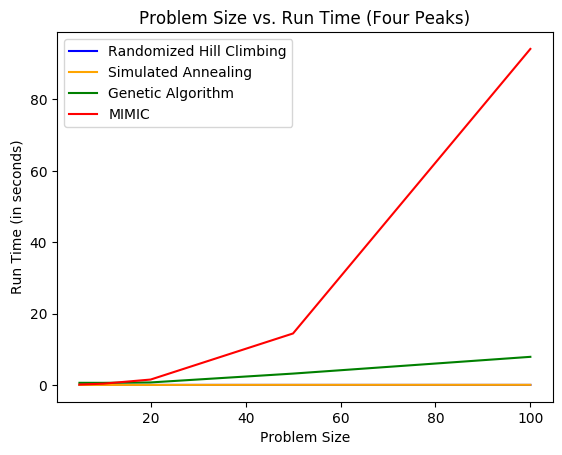

FUNCTION EVALUATIONS
Randomized Hill Climbing: [5552.0, 6064.0, 7138.0, 10539.0, 16560.0]
Simulated Annealing: [156.0, 116.0, 168.0, 1300.0, 1778.0]
Genetic Algorithm: [12012.0, 12012.0, 14016.0, 57070.0, 121154.0]
MIMIC: [5510.0, 6012.0, 7016.0, 10526.0, 16540.0]


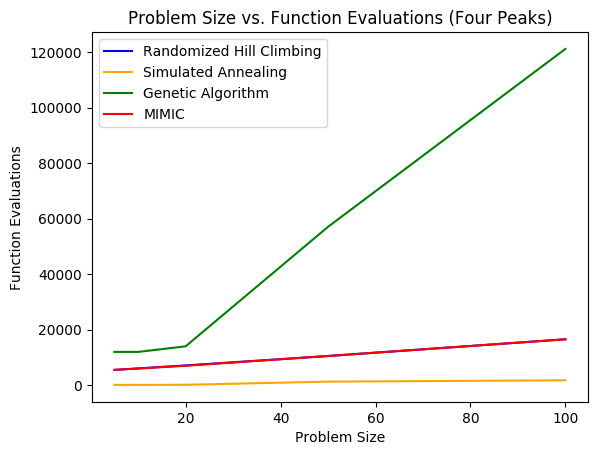

FITNESSES
Randomized Hill Climbing: [8.0, 17.0, 13.0, 6.0, 4.0]
Simulated Annealing: [8.0, 10.0, 32.0, 40.0, 32.0]
Genetic Algorithm: [8.0, 17.0, 35.0, 86.0, 93.0]
MIMIC: [8.0, 17.0, 35.0, 78.0, 30.0]


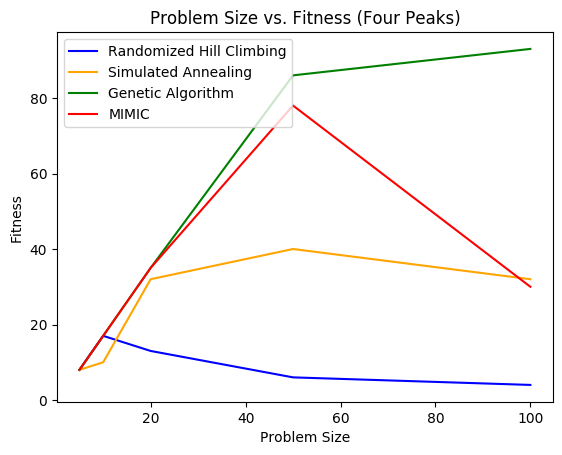

In [456]:
def plot_four_peaks_times():
    print("TIMES")
    plt.title("Problem Size vs. Run Time (Four Peaks)")
    plt.xlabel("Problem Size")
    plt.ylabel("Run Time (in seconds)")
    for i in range(0, len(algorithm_names)):
        algorithm_name = algorithm_names[i]
        algorithm_color = algorithm_colors[i]
        print(algorithm_name + ": " + str(four_peaks_times_per_algorithm[algorithm_name]))
        plt.plot(problem_size_list, four_peaks_times_per_algorithm[algorithm_name], label=algorithm_name, color=algorithm_color)
    plt.legend(loc="best")
    plt.show()
    plt.close()
plot_four_peaks_times()

def plot_four_peaks_function_evaluations():
    print("FUNCTION EVALUATIONS")
    plt.title("Problem Size vs. Function Evaluations (Four Peaks)")
    plt.xlabel("Problem Size")
    plt.ylabel("Function Evaluations")
    for i in range(0, len(algorithm_names)):
        algorithm_name = algorithm_names[i]
        algorithm_color = algorithm_colors[i]
        print(algorithm_name + ": " + str(four_peaks_function_evaluations_per_algorithm[algorithm_name]))
        plt.plot(problem_size_list, four_peaks_function_evaluations_per_algorithm[algorithm_name], label=algorithm_name, color=algorithm_color)
    plt.legend(loc="best")
    plt.show()
    plt.close()
plot_four_peaks_function_evaluations()

def plot_four_peaks_fitnesses():
    print("FITNESSES")
    plt.title("Problem Size vs. Fitness (Four Peaks)")
    plt.xlabel("Problem Size")
    plt.ylabel("Fitness")
    for i in range(0, len(algorithm_names)):
        algorithm_name = algorithm_names[i]
        algorithm_color = algorithm_colors[i]
        print(algorithm_name + ": " + str(four_peaks_fitness_per_algorithm[algorithm_name]))
        plt.plot(problem_size_list, four_peaks_fitness_per_algorithm[algorithm_name], label=algorithm_name, color=algorithm_color)
    plt.legend(loc="best")
    plt.show()
    plt.close()
plot_four_peaks_fitnesses()

## N Queens

## Knapsack

## Neural Networks

In [164]:
# https://archive.ics.uci.edu/ml/datasets/wine+quality
wine_dataset = pd.read_csv('wine_quality.csv')  
print("# of Rows: ", len(wine_dataset))
print("# of Columns: ", len(wine_dataset.columns))

# https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.shape.html
wine_X = wine_dataset.iloc[:,:-1]
wine_Y = wine_dataset.iloc[: , -1]
print("X Shape: ", wine_X.shape)
print("Y Shape: ", wine_Y.shape)

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# 30-70 split
wine_X_train, wine_X_test, wine_Y_train, wine_Y_test = train_test_split(wine_X, wine_Y, test_size=0.30, random_state=5)
print("X Train Shape: ", wine_X_train.shape)
print("X Test Shape: ", wine_X_test.shape)
print("Y Train Shape: ", wine_Y_train.shape)
print("Y Test Shape: ", wine_Y_test.shape)

wine_dataset.head()

# of Rows:  1599
# of Columns:  12
X Shape:  (1599, 11)
Y Shape:  (1599,)
X Train Shape:  (1119, 11)
X Test Shape:  (480, 11)
Y Train Shape:  (1119,)
Y Test Shape:  (480,)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [165]:
# https://readthedocs.org/projects/mlrose/downloads/pdf/stable/
scaler = MinMaxScaler()
wine_X_train_scaled = scaler.fit_transform(wine_X_train)
wine_X_test_scaled = scaler.transform(wine_X_test)

one_hot = OneHotEncoder()
wine_Y_train_hot = one_hot.fit_transform(wine_Y_train.values.reshape(-1, 1)).todense()
wine_Y_test_hot = one_hot.transform(wine_Y_test.values.reshape(-1, 1)).todense()

print("X Train Shape: ", wine_X_train_scaled.shape)
print("X Test Shape: ", wine_X_test_scaled.shape)
print("Y Train Shape: ", wine_Y_train_hot.shape)
print("Y Test Shape: ", wine_Y_test_hot.shape)

X Train Shape:  (1119, 11)
X Test Shape:  (480, 11)
Y Train Shape:  (1119, 6)
Y Test Shape:  (480, 6)


In [333]:
def generate_neural_network_scores(nn):
    nn.fit(wine_X_train_scaled, wine_Y_train_hot)
    wine_Y_train_pred = nn.predict(wine_X_train_scaled)
    wine_Y_test_pred = nn.predict(wine_X_test_scaled)
    training_accuracy = accuracy_score(wine_Y_train_hot, wine_Y_train_pred)
    training_f1_score = f1_score(wine_Y_train_hot, wine_Y_train_pred, average="macro")
    print("Training Accuracy: ", training_accuracy)
#     print("Training F1 Score: ", training_f1_score)
    testing_accuracy = accuracy_score(wine_Y_test_hot, wine_Y_test_pred)
    testing_f1_score = f1_score(wine_Y_test_hot, wine_Y_test_pred, average="macro")
    print("Testing Accuracy: ", testing_accuracy)
#     print("Testing F1 Score: ", testing_f1_score)
    
# https://chrisalbon.com/code/machine_learning/model_evaluation/plot_the_learning_curve/
def create_learning_curve(classifier, X, Y, title, color1):
    # Create CV training and test scores for various training set sizes
    train_sizes, train_scores, test_scores = learning_curve(classifier, 
                                                            X, 
                                                            Y,
                                                            cv=3,
                                                            scoring='accuracy',
                                                            n_jobs=-1,
                                                            train_sizes=np.linspace(0.1, 1.0, 5))

    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Draw lines
    plt.plot(train_sizes, train_mean, '--', color=color1,  label="Training score")
    plt.plot(train_sizes, test_mean, color=color1, label="Cross-validation score")

    # Draw bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color=color1, alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color=color1, alpha=0.2)

    # Create plot
    plt.title("Learning Curve With " + title)
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()
    plt.close()
    

In [193]:
# https://mlrose.readthedocs.io/en/stable/source/neural.html

In [231]:
# Gradient Descent Hyperparameter Tuning
param_grid = {"learning_rate": [0.01, 0.001, 0.0001]}
nn = mlrose.NeuralNetwork(hidden_nodes=[], 
                                 activation='relu',
                                 algorithm='gradient_descent',
                                 max_iters=2000, 
                                 early_stopping=True,
                                 max_attempts=10,
                                 random_state=random_state)
nn_tuned = GridSearchCV(nn, param_grid, scoring='accuracy', cv=3)
nn_tuned.fit(wine_X_train_scaled, wine_Y_train_hot)
best_params = nn_tuned.best_params_
best_estimator = nn_tuned.best_estimator_
print("Best Params: ", best_params, best_estimator)

final_nn_gd = best_estimator
final_nn_gd.fit(wine_X_train_scaled, wine_Y_train_hot)
wine_Y_pred = final_nn_gd.predict(wine_X_test_scaled)
final_nn_accuracy = accuracy_score(wine_Y_test_hot, wine_Y_pred)
print("Accuracy Score w/ Tuning: ", final_nn_accuracy)

Best Params:  {'activation': 'relu', 'learning_rate': 0.001} NeuralNetwork(algorithm='gradient_descent', early_stopping=True,
              hidden_nodes=[], learning_rate=0.001, max_iters=2000,
              random_state=5)
Accuracy Score w/ Tuning:  0.61875


In [232]:
# Randomized Hill Climbing Hyperparameter Tuning
param_grid = {"learning_rate": [0.1, 0.2, 0.3, 0.4, 0.5, 0.01], "restarts": [5]}
nn = mlrose.NeuralNetwork(hidden_nodes=[2], 
                                 activation='relu',
                                 algorithm='random_hill_climb',
                                 max_iters=2000,
                                 early_stopping=True,
                                 max_attempts=10,
                                 random_state=random_state)
nn_tuned = GridSearchCV(nn, param_grid, scoring='accuracy', cv=3)
nn_tuned.fit(wine_X_train_scaled, wine_Y_train_hot)
best_params = nn_tuned.best_params_
best_estimator = nn_tuned.best_estimator_
print("Best Params: ", best_params, best_estimator)

final_nn_hc = best_estimator
final_nn_hc.fit(wine_X_train_scaled, wine_Y_train_hot)
wine_Y_pred = final_nn_hc.predict(wine_X_test_scaled)
final_nn_accuracy = accuracy_score(wine_Y_test_hot, wine_Y_pred)
print("Accuracy Score w/ Tuning: ", final_nn_accuracy)

Best Params:  {'learning_rate': 0.3, 'restarts': 5} NeuralNetwork(early_stopping=True, hidden_nodes=[2], learning_rate=0.3,
              max_iters=2000, random_state=5, restarts=5)
Accuracy Score w/ Tuning:  0.5770833333333333


In [233]:
# Simulated Annealing Hyperparameter Tuning
# "schedule": [mlrose.GeomDecay(), mlrose.ArithDecay(), mlrose.ExpDecay()
param_grid = {"learning_rate": [0.2, 0.25, 0.3, 0.35, 0.4, 0.45], "schedule": [mlrose.GeomDecay(), mlrose.ArithDecay()]}
nn = mlrose.NeuralNetwork(hidden_nodes=[5], 
                                 activation='relu',
                                 algorithm='simulated_annealing',
                                 max_iters=2000,
                                 early_stopping=True,
                                 max_attempts=10,
                                 clip_max=5, 
                                 random_state=random_state)
nn_tuned = GridSearchCV(nn, param_grid, scoring='accuracy', cv=3)
nn_tuned.fit(wine_X_train_scaled, wine_Y_train_hot)
best_params = nn_tuned.best_params_
best_estimator = nn_tuned.best_estimator_
print("Best Params: ", best_params, best_estimator)

final_nn_sa = best_estimator
final_nn_sa.fit(wine_X_train_scaled, wine_Y_train_hot)
wine_Y_pred = final_nn_sa.predict(wine_X_test_scaled)
final_nn_accuracy = accuracy_score(wine_Y_test_hot, wine_Y_pred)
print("Accuracy Score w/ Tuning: ", final_nn_accuracy)

Best Params:  {'learning_rate': 0.35, 'schedule': GeomDecay(init_temp=1.0, decay=0.99, min_temp=0.001)} NeuralNetwork(algorithm='simulated_annealing', clip_max=5, early_stopping=True,
              hidden_nodes=[5], learning_rate=0.35, max_iters=2000,
              random_state=5)
Accuracy Score w/ Tuning:  0.6020833333333333


In [234]:
# Genetic Algorithm Hyperparameter Tuning
param_grid = {"learning_rate": [0.01, 0.001, 0.0001, 0.1], 'pop_size': [100, 150, 200, 250, 300, 350, 400], 'mutation_prob': [0.01, 0.05, 0.005]}
nn = mlrose.NeuralNetwork(hidden_nodes=[20], 
                                 activation='relu',
                                 algorithm='genetic_alg',
                                 max_iters=2000,
                                 early_stopping=True,
                                 max_attempts=10,
                                 random_state=random_state)
nn_tuned = GridSearchCV(nn, param_grid, scoring='accuracy', cv=3)
nn_tuned.fit(wine_X_train_scaled, wine_Y_train_hot)
best_params = nn_tuned.best_params_
best_estimator = nn_tuned.best_estimator_
print("Best Params: ", best_params, best_estimator)

final_nn_ga = best_estimator
final_nn_ga.fit(wine_X_train_scaled, wine_Y_train_hot)
wine_Y_pred = final_nn_ga.predict(wine_X_test_scaled)
final_nn_accuracy = accuracy_score(wine_Y_test_hot, wine_Y_pred)
print("Accuracy Score w/ Tuning: ", final_nn_accuracy)

Best Params:  {'learning_rate': 0.01, 'mutation_prob': 0.01, 'pop_size': 150} NeuralNetwork(algorithm='genetic_alg', early_stopping=True, hidden_nodes=[20],
              learning_rate=0.01, max_iters=2000, mutation_prob=0.01,
              pop_size=150, random_state=5)
Accuracy Score w/ Tuning:  0.5958333333333333


In [270]:
algorithm_names = ["Gradient Descent", "Randomized Hill Climbing", "Simulated Annealing", "Genetic Algorithm"]
algorithm_colors = ["red", "blue", "orange", "green"]

In [310]:
nn_fit_times_per_model = {}
nn_training_predict_times_per_model = {}
nn_testing_predict_times_per_model = {}
nn_training_accuracy_scores_per_model = {}
nn_testing_accuracy_scores_per_model = {}
nn_training_f1_scores_per_model = {}
nn_testing_f1_scores_per_model = {}

for name in algorithm_names:
        nn_fit_times_per_model[name] = []
        nn_training_predict_times_per_model[name] = []
        nn_testing_predict_times_per_model[name] = []
        nn_training_accuracy_scores_per_model[name] = []
        nn_testing_accuracy_scores_per_model[name] = []
        nn_training_f1_scores_per_model[name] = []
        nn_testing_f1_scores_per_model[name] = []

In [288]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
# https://www.askpython.com/python/examples/k-fold-cross-validation
def nn_fit_and_predict(name, model):
    print("\nALGORITHM: ", name)
    fit_times = []
    training_predict_times = []
    testing_predict_times = []
    training_accuracy_scores = []
    testing_accuracy_scores = []
    training_f1_scores = []
    testing_f1_scores = []
    k = 3
    kf = KFold(n_splits=k)
    for train_index, test_index in kf.split(wine_X_train_scaled):
        X_train, X_test = wine_X_train_scaled[train_index], wine_X_train_scaled[test_index]
        y_train, y_test = wine_Y_train_hot[train_index], wine_Y_train_hot[test_index]

        fit_time_start = time.time()
        model.fit(X_train, y_train)
        fit_time_end = time.time()
        wine_fit_time = fit_time_end - fit_time_start
#         print("Fit Time: ", wine_fit_time)
        fit_times.append(wine_fit_time)

        predict_time_start = time.time()
        wine_Y_train_pred = model.predict(X_train)
        predict_time_end = time.time()
        wine_predict_time = predict_time_end - predict_time_start
#         print("Predict Time (Training): ", wine_predict_time)
        training_predict_times.append(wine_predict_time)

        predict_time_start = time.time()
        wine_Y_test_pred = model.predict(X_test)
        predict_time_end = time.time()
        wine_predict_time = predict_time_end - predict_time_start
#         print("Predict Time (Testing): ", wine_predict_time)
        testing_predict_times.append(wine_predict_time)

        training_accuracy = accuracy_score(y_train, wine_Y_train_pred)
        testing_accuracy = accuracy_score(y_test, wine_Y_test_pred)
#         print("Training Accuracy: ", training_accuracy)
#         print("Testing Accuracy: ", testing_accuracy)
        training_accuracy_scores.append(training_accuracy)
        testing_accuracy_scores.append(testing_accuracy)

        training_f1_score = f1_score(y_train, wine_Y_train_pred, average="macro")
        testing_f1_score = f1_score(y_test, wine_Y_test_pred, average="macro")
#         print("Training F1 Score: ", training_f1_score)
#         print("Testing F1 Score: ", testing_f1_score)
        training_f1_scores.append(training_accuracy)
        testing_f1_scores.append(testing_accuracy)
    avg_fit_time = sum(fit_times) / k
    avg_training_predict_time = sum(training_predict_times) / k
    avg_testing_predict_time = sum(testing_predict_times) / k
    avg_training_accuracy_score = sum(training_accuracy_scores) / k
    avg_testing_accuracy_score = sum(testing_accuracy_scores) / k
    avg_training_f1_score = sum(training_f1_scores) / k
    avg_testing_f1_score = sum(testing_f1_scores) / k
    print("Average Fit Time: ", avg_fit_time)
    print("Average Training Accuracy: ", avg_training_accuracy_score)
    print("Average Testing Accuracy: ", avg_testing_accuracy_score)
    
    nn_fit_times_per_model[name].append(avg_fit_time)
    nn_training_predict_times_per_model[name].append(avg_training_predict_time)
    nn_testing_predict_times_per_model[name].append(avg_testing_predict_time)
    nn_training_accuracy_scores_per_model[name].append(avg_training_accuracy_score)
    nn_testing_accuracy_scores_per_model[name].append(avg_testing_accuracy_score)
    nn_training_f1_scores_per_model[name].append(avg_training_f1_score)
    nn_testing_f1_scores_per_model[name].append(avg_testing_f1_score)

In [289]:
max_iters_list = np.arange(0, 2100, 25).tolist()
for max_iters in max_iters_list:
    print("ITERATION: ", max_iters)
    nn_gd = mlrose.NeuralNetwork(hidden_nodes=[], 
                                 activation='relu',
                                 algorithm='gradient_descent',
                                 max_iters=max_iters, 
                                 early_stopping=True,
                                 max_attempts=10,
                                 random_state=random_state,
                                 learning_rate=0.001)
    nn_fit_and_predict("Gradient Descent", nn_gd)

ITERATION:  0

ALGORITHM:  Gradient Descent
Average Fit Time:  0.004161675771077474
Average Training Accuracy:  0.40929401251117065
Average Testing Accuracy:  0.40929401251117065
ITERATION:  25

ALGORITHM:  Gradient Descent
Average Fit Time:  0.06888016064961751
Average Training Accuracy:  0.4986595174262735
Average Testing Accuracy:  0.4798927613941018
ITERATION:  50

ALGORITHM:  Gradient Descent
Average Fit Time:  0.13010303179423013
Average Training Accuracy:  0.5536193029490617
Average Testing Accuracy:  0.5344057193923146
ITERATION:  75

ALGORITHM:  Gradient Descent
Average Fit Time:  0.19453096389770508
Average Training Accuracy:  0.5674709562109027
Average Testing Accuracy:  0.5603217158176944
ITERATION:  100

ALGORITHM:  Gradient Descent
Average Fit Time:  0.2587722937266032
Average Training Accuracy:  0.5665773011617516
Average Testing Accuracy:  0.5540661304736373
ITERATION:  125

ALGORITHM:  Gradient Descent
Average Fit Time:  0.33957362174987793
Average Training Accuracy:  

Average Fit Time:  2.8607029914855957
Average Training Accuracy:  0.5987488829311886
Average Testing Accuracy:  0.5746201966041108
ITERATION:  1200

ALGORITHM:  Gradient Descent
Average Fit Time:  2.950831492741903
Average Training Accuracy:  0.5996425379803395
Average Testing Accuracy:  0.5764075067024129
ITERATION:  1225

ALGORITHM:  Gradient Descent
Average Fit Time:  2.9948860009511313
Average Training Accuracy:  0.5996425379803395
Average Testing Accuracy:  0.5764075067024129
ITERATION:  1250

ALGORITHM:  Gradient Descent
Average Fit Time:  3.0536020596822104
Average Training Accuracy:  0.6000893655049151
Average Testing Accuracy:  0.5764075067024129
ITERATION:  1275

ALGORITHM:  Gradient Descent
Average Fit Time:  3.1124256451924643
Average Training Accuracy:  0.599195710455764
Average Testing Accuracy:  0.5764075067024129
ITERATION:  1300

ALGORITHM:  Gradient Descent
Average Fit Time:  3.175706227620443
Average Training Accuracy:  0.5996425379803395
Average Testing Accuracy:  0

In [311]:
for max_iters in max_iters_list:
    print("ITERATION: ", max_iters)
    nn_hc = mlrose.NeuralNetwork(hidden_nodes=[2], 
                                 activation='relu',
                                 algorithm='random_hill_climb',
                                 max_iters=max_iters,
                                 early_stopping=True,
                                 max_attempts=10,
                                 random_state=random_state, 
                                 learning_rate=0.3,
                                 restarts=5)
    nn_fit_and_predict("Randomized Hill Climbing", nn_hc)

ITERATION:  0

ALGORITHM:  Randomized Hill Climbing
Average Fit Time:  0.011382341384887695
Average Training Accuracy:  0.008936550491510277
Average Testing Accuracy:  0.008936550491510277
ITERATION:  25

ALGORITHM:  Randomized Hill Climbing
Average Fit Time:  0.26878833770751953
Average Training Accuracy:  0.40437890974084006
Average Testing Accuracy:  0.40303842716711347
ITERATION:  50

ALGORITHM:  Randomized Hill Climbing
Average Fit Time:  0.5133039951324463
Average Training Accuracy:  0.40840035746201964
Average Testing Accuracy:  0.40840035746201964
ITERATION:  75

ALGORITHM:  Randomized Hill Climbing
Average Fit Time:  0.7584793567657471
Average Training Accuracy:  0.4624664879356568
Average Testing Accuracy:  0.4647006255585344
ITERATION:  100

ALGORITHM:  Randomized Hill Climbing
Average Fit Time:  1.0541836420694988
Average Training Accuracy:  0.48346738159070596
Average Testing Accuracy:  0.4897229669347632
ITERATION:  125

ALGORITHM:  Randomized Hill Climbing
Average Fit Ti

Average Fit Time:  2.011340379714966
Average Training Accuracy:  0.5594280607685433
Average Testing Accuracy:  0.543342269883825
ITERATION:  1150

ALGORITHM:  Randomized Hill Climbing
Average Fit Time:  2.019545078277588
Average Training Accuracy:  0.5594280607685433
Average Testing Accuracy:  0.543342269883825
ITERATION:  1175

ALGORITHM:  Randomized Hill Climbing
Average Fit Time:  2.026223580042521
Average Training Accuracy:  0.5594280607685433
Average Testing Accuracy:  0.543342269883825
ITERATION:  1200

ALGORITHM:  Randomized Hill Climbing
Average Fit Time:  2.038067658742269
Average Training Accuracy:  0.5594280607685433
Average Testing Accuracy:  0.543342269883825
ITERATION:  1225

ALGORITHM:  Randomized Hill Climbing
Average Fit Time:  2.0088609059651694
Average Training Accuracy:  0.5594280607685433
Average Testing Accuracy:  0.543342269883825
ITERATION:  1250

ALGORITHM:  Randomized Hill Climbing
Average Fit Time:  2.0069820880889893
Average Training Accuracy:  0.55942806076

In [307]:
for max_iters in max_iters_list:
    print("ITERATION: ", max_iters)
    nn_sa = mlrose.NeuralNetwork(hidden_nodes=[5], 
                                 activation='relu',
                                 algorithm='simulated_annealing',
                                 max_iters=max_iters,
                                 early_stopping=True,
                                 max_attempts=10,
                                 clip_max=5, 
                                 random_state=random_state,
                                 learning_rate=0.35,
                                 schedule=mlrose.GeomDecay())
    nn_fit_and_predict("Simulated Annealing", nn_sa)

ITERATION:  0

ALGORITHM:  Simulated Annealing
Average Fit Time:  0.002734661102294922
Average Training Accuracy:  0.420017873100983
Average Testing Accuracy:  0.420017873100983
ITERATION:  25

ALGORITHM:  Simulated Annealing
Average Fit Time:  0.06328940391540527
Average Training Accuracy:  0.41823056300268097
Average Testing Accuracy:  0.41823056300268097
ITERATION:  50

ALGORITHM:  Simulated Annealing
Average Fit Time:  0.13501938184102377
Average Training Accuracy:  0.4008042895442359
Average Testing Accuracy:  0.4012511170688115
ITERATION:  75

ALGORITHM:  Simulated Annealing
Average Fit Time:  0.20596440633138022
Average Training Accuracy:  0.4173369079535299
Average Testing Accuracy:  0.41823056300268097
ITERATION:  100

ALGORITHM:  Simulated Annealing
Average Fit Time:  0.2639600435892741
Average Training Accuracy:  0.45576407506702415
Average Testing Accuracy:  0.44682752457551383
ITERATION:  125

ALGORITHM:  Simulated Annealing
Average Fit Time:  0.3327643076578776
Average Tr

Average Fit Time:  2.5183788935343423
Average Training Accuracy:  0.5737265415549598
Average Testing Accuracy:  0.5495978552278821
ITERATION:  1175

ALGORITHM:  Simulated Annealing
Average Fit Time:  2.5791423320770264
Average Training Accuracy:  0.5795352993744415
Average Testing Accuracy:  0.5522788203753352
ITERATION:  1200

ALGORITHM:  Simulated Annealing
Average Fit Time:  2.626331647237142
Average Training Accuracy:  0.579982126899017
Average Testing Accuracy:  0.5603217158176944
ITERATION:  1225

ALGORITHM:  Simulated Annealing
Average Fit Time:  2.692103624343872
Average Training Accuracy:  0.579088471849866
Average Testing Accuracy:  0.5594280607685435
ITERATION:  1250

ALGORITHM:  Simulated Annealing
Average Fit Time:  2.7196946144104004
Average Training Accuracy:  0.5813226094727435
Average Testing Accuracy:  0.5558534405719393
ITERATION:  1275

ALGORITHM:  Simulated Annealing
Average Fit Time:  2.784190575281779
Average Training Accuracy:  0.5728328865058088
Average Testing

In [299]:
for max_iters in max_iters_list:
    print("ITERATION: ", max_iters)
    nn_ga = mlrose.NeuralNetwork(hidden_nodes=[20], 
                                     activation='relu',
                                     algorithm='genetic_alg',
                                     max_iters=max_iters,
                                     early_stopping=True,
                                     max_attempts=10,
                                     random_state=random_state,
                                     learning_rate=0.01,
                                     pop_size=150,
                                     mutation_prob=0.01)
    nn_fit_and_predict("Genetic Algorithm", nn_ga) 

ITERATION:  0

ALGORITHM:  Genetic Algorithm
Average Fit Time:  0.25568660100301105
Average Training Accuracy:  0.2636282394995532
Average Testing Accuracy:  0.26362823949955316
ITERATION:  25

ALGORITHM:  Genetic Algorithm
Average Fit Time:  5.447895685831706
Average Training Accuracy:  0.5880250223413762
Average Testing Accuracy:  0.5781948168007149
ITERATION:  50

ALGORITHM:  Genetic Algorithm
Average Fit Time:  9.187297900517782
Average Training Accuracy:  0.597408400357462
Average Testing Accuracy:  0.5781948168007149
ITERATION:  75

ALGORITHM:  Genetic Algorithm
Average Fit Time:  9.139450709025065
Average Training Accuracy:  0.597408400357462
Average Testing Accuracy:  0.5781948168007149
ITERATION:  100

ALGORITHM:  Genetic Algorithm
Average Fit Time:  9.249650637308756
Average Training Accuracy:  0.597408400357462
Average Testing Accuracy:  0.5781948168007149
ITERATION:  125

ALGORITHM:  Genetic Algorithm
Average Fit Time:  9.17081125577291
Average Training Accuracy:  0.5974084

Average Fit Time:  9.099196990331015
Average Training Accuracy:  0.597408400357462
Average Testing Accuracy:  0.5781948168007149
ITERATION:  1200

ALGORITHM:  Genetic Algorithm
Average Fit Time:  9.149124383926392
Average Training Accuracy:  0.597408400357462
Average Testing Accuracy:  0.5781948168007149
ITERATION:  1225

ALGORITHM:  Genetic Algorithm
Average Fit Time:  9.17414387067159
Average Training Accuracy:  0.597408400357462
Average Testing Accuracy:  0.5781948168007149
ITERATION:  1250

ALGORITHM:  Genetic Algorithm
Average Fit Time:  9.161757230758667
Average Training Accuracy:  0.597408400357462
Average Testing Accuracy:  0.5781948168007149
ITERATION:  1275

ALGORITHM:  Genetic Algorithm
Average Fit Time:  9.17678133646647
Average Training Accuracy:  0.597408400357462
Average Testing Accuracy:  0.5781948168007149
ITERATION:  1300

ALGORITHM:  Genetic Algorithm
Average Fit Time:  9.132083495457968
Average Training Accuracy:  0.597408400357462
Average Testing Accuracy:  0.57819

In [314]:
# print("FIT TIMES: ", nn_fit_times_per_model)
# print("TRAINING PREDICT TIMES: ", nn_training_predict_times_per_model)
# print("TESTING PREDICT TIMES: ", nn_testing_predict_times_per_model)
print("TRAINING ACCURACY SCORES: ", nn_training_accuracy_scores_per_model)
# print("TESTING ACCURACY SCORES: ", nn_testing_accuracy_scores_per_model)
print("TRAINING F1 SCORES: ", nn_training_f1_scores_per_model)
# print("TESTING F1 SCORES: ", nn_testing_f1_scores_per_model)

TRAINING ACCURACY SCORES:  {'Gradient Descent': [0.40929401251117065, 0.4986595174262735, 0.5536193029490617, 0.5674709562109027, 0.5665773011617516, 0.5692582663092046, 0.5679177837354782, 0.5719392314566578, 0.5732797140303844, 0.5777479892761396, 0.5817694369973191, 0.5813226094727436, 0.5813226094727435, 0.5840035746201966, 0.5844504021447721, 0.5844504021447721, 0.5840035746201967, 0.5857908847184986, 0.5848972296693477, 0.5875781948168007, 0.5875781948168006, 0.5871313672922253, 0.5875781948168006, 0.5871313672922253, 0.5893655049151028, 0.5898123324396782, 0.5898123324396783, 0.5915996425379804, 0.5929401251117069, 0.5938337801608579, 0.5942806076854333, 0.5956210902591599, 0.596514745308311, 0.597408400357462, 0.5960679177837354, 0.5969615728328864, 0.5974084003574619, 0.5974084003574619, 0.5969615728328864, 0.5974084003574619, 0.5978552278820375, 0.5978552278820375, 0.5978552278820375, 0.5974084003574619, 0.5978552278820375, 0.5987488829311886, 0.599195710455764, 0.59874888293

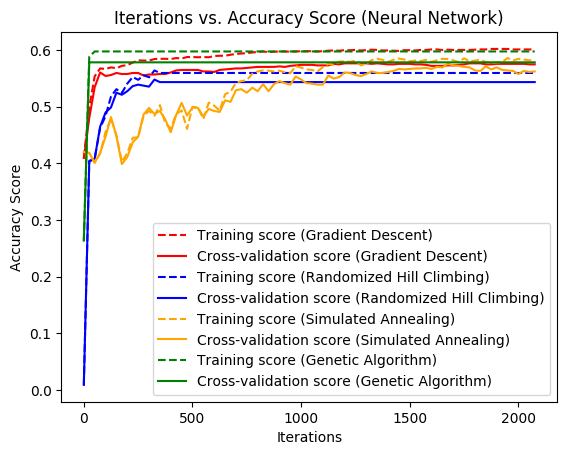

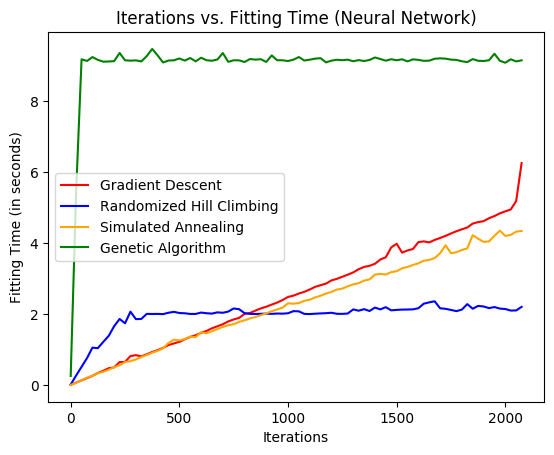

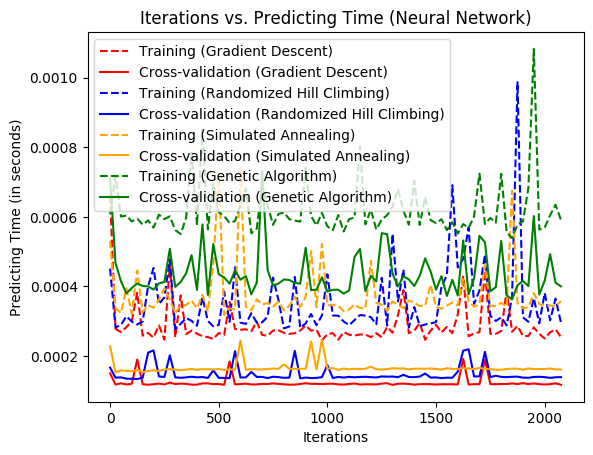

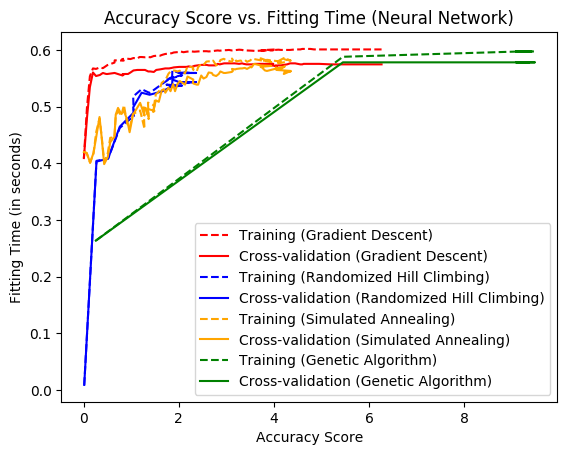

In [335]:
def plot_accuracies():
    plt.title("Iterations vs. Accuracy Score (Neural Network)")
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy Score")
    for i in range(0, len(algorithm_names)):
        name = algorithm_names[i]
        color = algorithm_colors[i]
        plt.plot(max_iters_list, nn_training_accuracy_scores_per_model[name], label='Training score (' + name + ')', color=color, linestyle='dashed')
        plt.plot(max_iters_list, nn_testing_accuracy_scores_per_model[name], label='Cross-validation score (' + name + ')', color=color)
        plt.legend(loc='best')
    plt.show()
    plt.close()
plot_accuracies()

# def plot_f1_scores():
#     plt.title("Iterations vs. F1 Score")
#     plt.xlabel("Iterations")
#     plt.ylabel("F1 Score")
#     for i in range(0, len(algorithm_names)):
#         name = algorithm_names[i]
#         color = algorithm_colors[i]
#         plt.plot(max_iters_list, nn_training_f1_scores_per_model[name], label='Training score (' + name + ')', color=color, linestyle='dashed')
#         plt.plot(max_iters_list, nn_testing_f1_scores_per_model[name], label='Cross-validation score (' + name + ')', color=color)
#         plt.legend(loc='best')
#     plt.show()
#     plt.close()
# plot_f1_scores()

def plot_fit_times():
    plt.title("Iterations vs. Fitting Time (Neural Network)")
    plt.xlabel("Iterations")
    plt.ylabel("Fitting Time (in seconds)")
    for i in range(0, len(algorithm_names)):
        name = algorithm_names[i]
        color = algorithm_colors[i]
        plt.plot(max_iters_list, nn_fit_times_per_model[name], label=name, color=color)
        plt.legend(loc='best')
    plt.show()
    plt.close()
plot_fit_times()

def plot_predict_times():
    plt.title("Iterations vs. Predicting Time (Neural Network)")
    plt.xlabel("Iterations")
    plt.ylabel("Predicting Time (in seconds)")
    for i in range(0, len(algorithm_names)):
        name = algorithm_names[i]
        color = algorithm_colors[i]
        plt.plot(max_iters_list, nn_training_predict_times_per_model[name], label='Training (' + name + ')', color=color, linestyle='dashed')
        plt.plot(max_iters_list, nn_testing_predict_times_per_model[name], label='Cross-validation (' + name + ')', color=color)
        plt.legend(loc='best')
    plt.show()
    plt.close()
plot_predict_times()

def plot_predict_times():
    plt.title("Accuracy Score vs. Fitting Time (Neural Network)")
    plt.xlabel("Accuracy Score")
    plt.ylabel("Fitting Time (in seconds)")
    for i in range(0, len(algorithm_names)):
        name = algorithm_names[i]
        color = algorithm_colors[i]
        plt.plot(nn_fit_times_per_model[name], nn_training_accuracy_scores_per_model[name], label='Training (' + name + ')', color=color, linestyle='dashed')
        plt.plot(nn_fit_times_per_model[name], nn_testing_accuracy_scores_per_model[name], label='Cross-validation (' + name + ')', color=color)
        plt.legend(loc='best')
    plt.show()
    plt.close()
plot_predict_times()

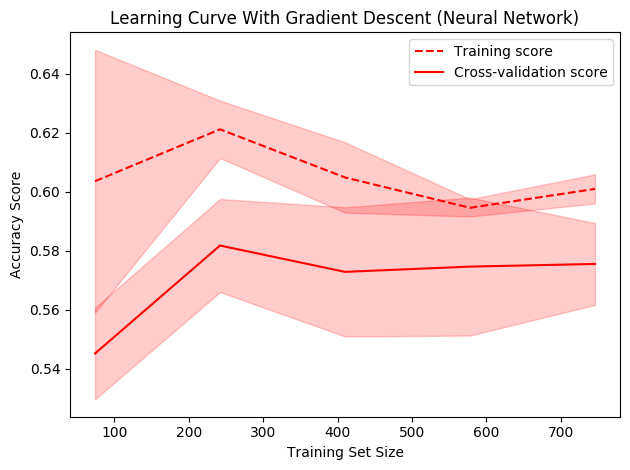

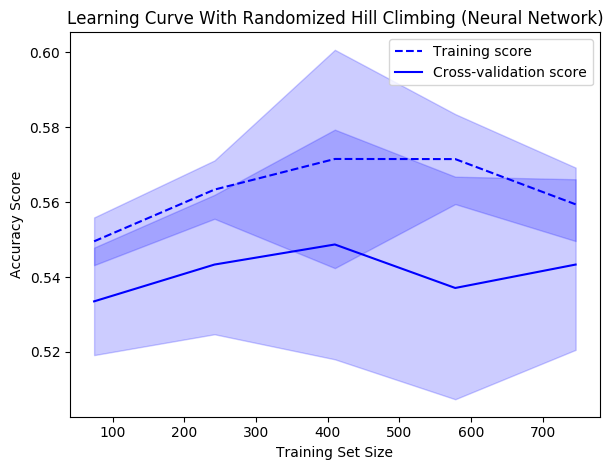

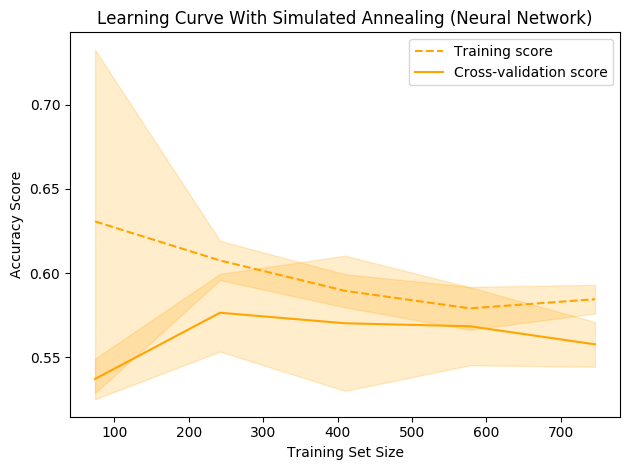

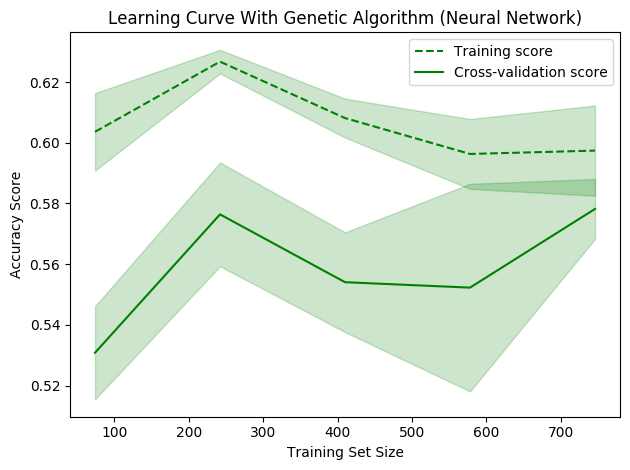

In [334]:
# https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html?highlight=loss+curve
nn_gd_for_learning_curve = mlrose.NeuralNetwork(hidden_nodes=[], 
                             activation='relu',
                             algorithm='gradient_descent',
                             max_iters=2000, 
                             early_stopping=True,
                             max_attempts=10,
                             random_state=random_state,
                             learning_rate=0.001,
                            curve=True)
create_learning_curve(nn_gd_for_learning_curve, wine_X_train_scaled, wine_Y_train_hot, "Gradient Descent (Neural Network)", "red")
nn_hc_for_learning_curve = mlrose.NeuralNetwork(hidden_nodes=[2], 
                             activation='relu',
                             algorithm='random_hill_climb',
                             max_iters=2000,
                             early_stopping=True,
                             max_attempts=10,
                             random_state=random_state, 
                             learning_rate=0.3,
                             restarts=5)
create_learning_curve(nn_hc_for_learning_curve, wine_X_train_scaled, wine_Y_train_hot, "Randomized Hill Climbing (Neural Network)", "blue")
nn_sa_for_learning_curve = mlrose.NeuralNetwork(hidden_nodes=[5], 
                         activation='relu',
                         algorithm='simulated_annealing',
                         max_iters=2000,
                         early_stopping=True,
                         max_attempts=10,
                         clip_max=5, 
                         random_state=random_state,
                         learning_rate=0.35,
                         schedule=mlrose.GeomDecay())
create_learning_curve(nn_sa_for_learning_curve, wine_X_train_scaled, wine_Y_train_hot, "Simulated Annealing (Neural Network)", "orange")
nn_ga_for_learning_curve = mlrose.NeuralNetwork(hidden_nodes=[20], 
                             activation='relu',
                             algorithm='genetic_alg',
                             max_iters=2000,
                             early_stopping=True,
                             max_attempts=10,
                             random_state=random_state,
                             learning_rate=0.01,
                             pop_size=150,
                             mutation_prob=0.01)
create_learning_curve(nn_ga_for_learning_curve, wine_X_train_scaled, wine_Y_train_hot, "Genetic Algorithm (Neural Network)", "green")

In [ ]:
# restarts (int, default: 0) – Number of random restarts. Only required if algorithm = 'random_hill_climb'.
# schedule (schedule object, default = mlrose.GeomDecay()) – Schedule used to determine the value of the temperature parameter. Only required if algorithm = 'simulated_annealing'.
# pop_size (int, default: 200) – Size of population. Only required if algorithm = 'genetic_alg'.
# mutation_prob (float, default: 0.1) – Probability of a mutation at each element of the state vector during reproduction, expressed as a value between 0 and 1. Only required if algorithm = 'genetic_alg'.

# train n test loss log_loss
# learning curve (training examples vs. score) and a loss curve!!!

